### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [61]:
from sklearn.datasets import load_boston

boston = load_boston()

In [62]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
?StandardScaler

In [66]:
scaler = StandardScaler(with_mean=False)

In [67]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [68]:
from sklearn.manifold import TSNE

In [69]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


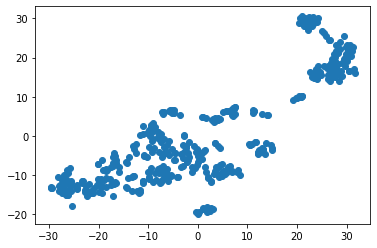

In [70]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [71]:
from sklearn.cluster import KMeans

In [72]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [73]:
labels_train = model.fit_predict(X_train_scaled)

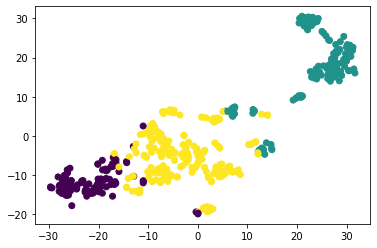

In [74]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [75]:
y_train.mean()

22.796534653465343

In [76]:
y_train[labels_train == 0].mean()

27.78837209302326

In [77]:
y_train[labels_train == 1].mean()

16.165354330708663

In [78]:
y_train[labels_train == 2].mean()

24.958115183246072

In [79]:
X_train.groupby(labels_train)['CRIM'].mean()

0     0.073566
1    10.797028
2     0.421660
Name: CRIM, dtype: float64

### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [82]:
labels_test = model.predict(X_test_scaled)

In [83]:
labels_test

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [85]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

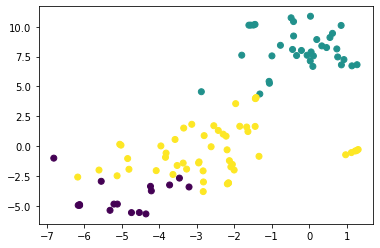

In [87]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [88]:
y_test[labels_test == 0].mean()

31.35

In [89]:
y_test[labels_test == 1].mean()

16.43714285714286

In [90]:
y_test[labels_test == 2].mean()

21.860784313725492

In [92]:
X_test.groupby(labels_test)['CRIM'].mean()

0     0.062060
1    10.165531
2     0.266079
Name: CRIM, dtype: float64